# Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

- ***R&D Spend -- Research and devolop spend in the past few years***
- ***Administration -- spend on administration in the past few years***
- ***Marketing Spend -- spend on Marketing in the past few years***
- ***State -- states from which data is collected***
- ***Profit  -- profit of each state in the past few years***

## Attaching Resources

### Importing Necessary Libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 200
sns.set_style(style='darkgrid')

### Adding Dataset

In [62]:
st = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_05_Multi%20Linear%20Regression/Dataset/50_Startups.csv')
st.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Performing EDA on the given dataset

### Applying Descriptive Statistics

In [63]:
st.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [64]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [65]:
st.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Visualizing The Data

<AxesSubplot:xlabel='Profit'>

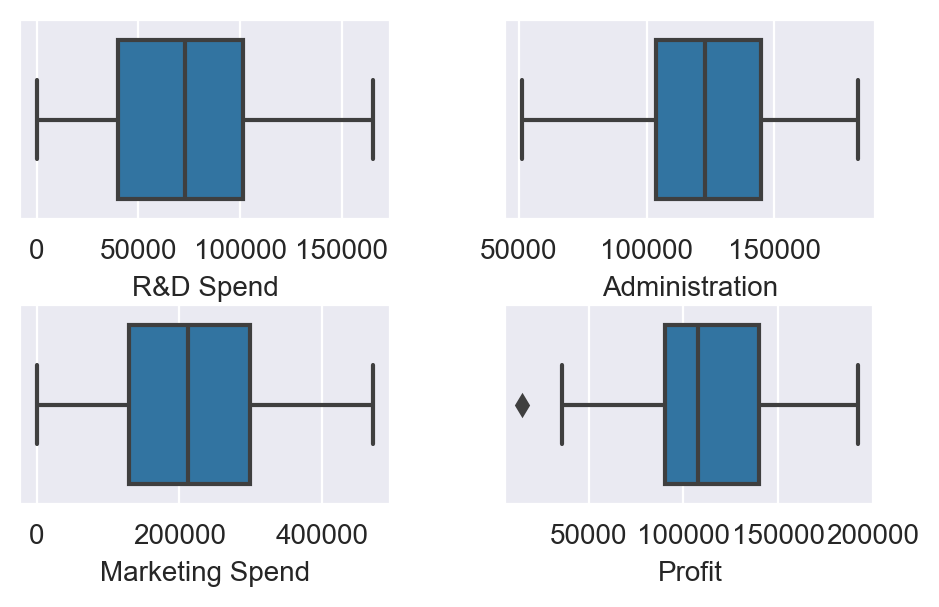

In [66]:
fig, ax = plt.subplots(2,2)
plt.tight_layout()

sns.boxplot(st['R&D Spend'], ax = ax[0,0])
sns.boxplot(st['Administration'], ax = ax[0,1])
sns.boxplot(st['Marketing Spend'], ax = ax[1,0])
sns.boxplot(st['Profit'], ax = ax[1,1])

<AxesSubplot:xlabel='Profit', ylabel='Density'>

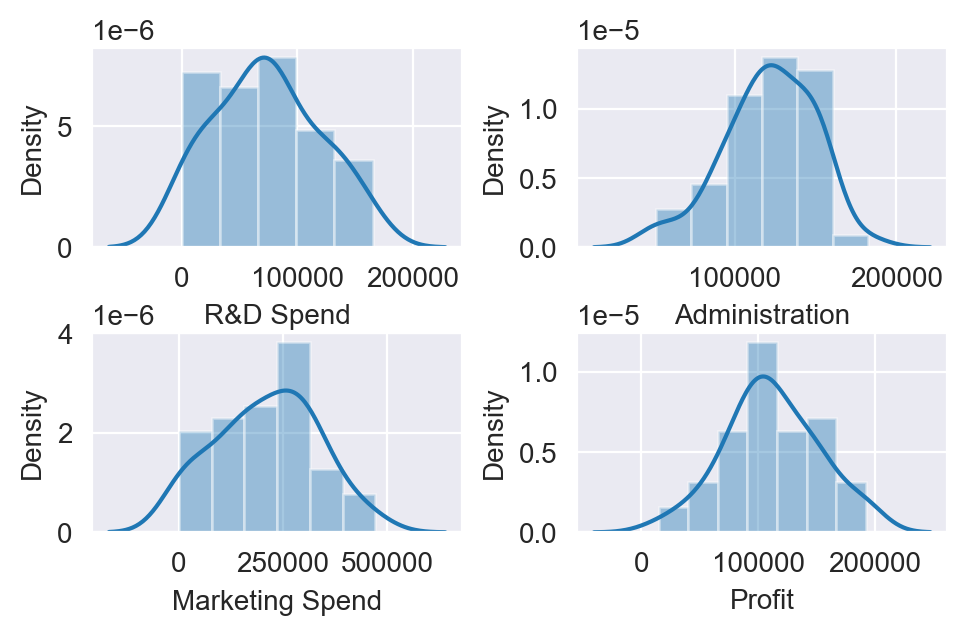

In [67]:
fig, ax = plt.subplots(2,2)
plt.tight_layout()

sns.distplot(st['R&D Spend'], ax = ax[0,0])
sns.distplot(st['Administration'], ax = ax[0,1])
sns.distplot(st['Marketing Spend'], ax = ax[1,0])
sns.distplot(st['Profit'], ax = ax[1,1])

<AxesSubplot:ylabel='State'>

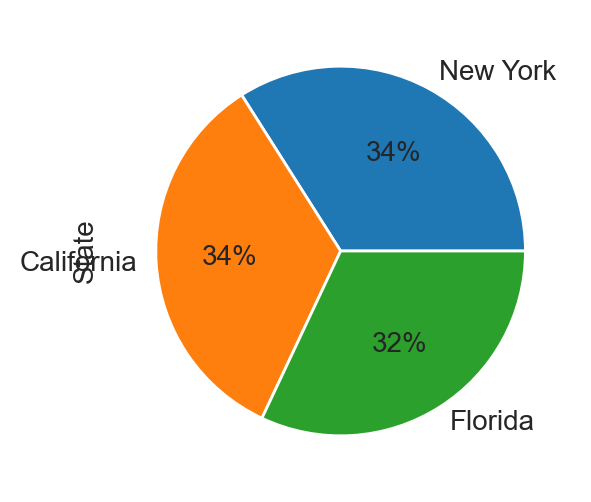

In [68]:
st['State'].value_counts().plot(kind='pie',autopct='%.0f%%')

In [72]:
fig = px.scatter_3d(x = st['R&D Spend'], y = st['Administration'], z = st['Profit'], color = st['State'])
fig.show()

### Correlation Analysis

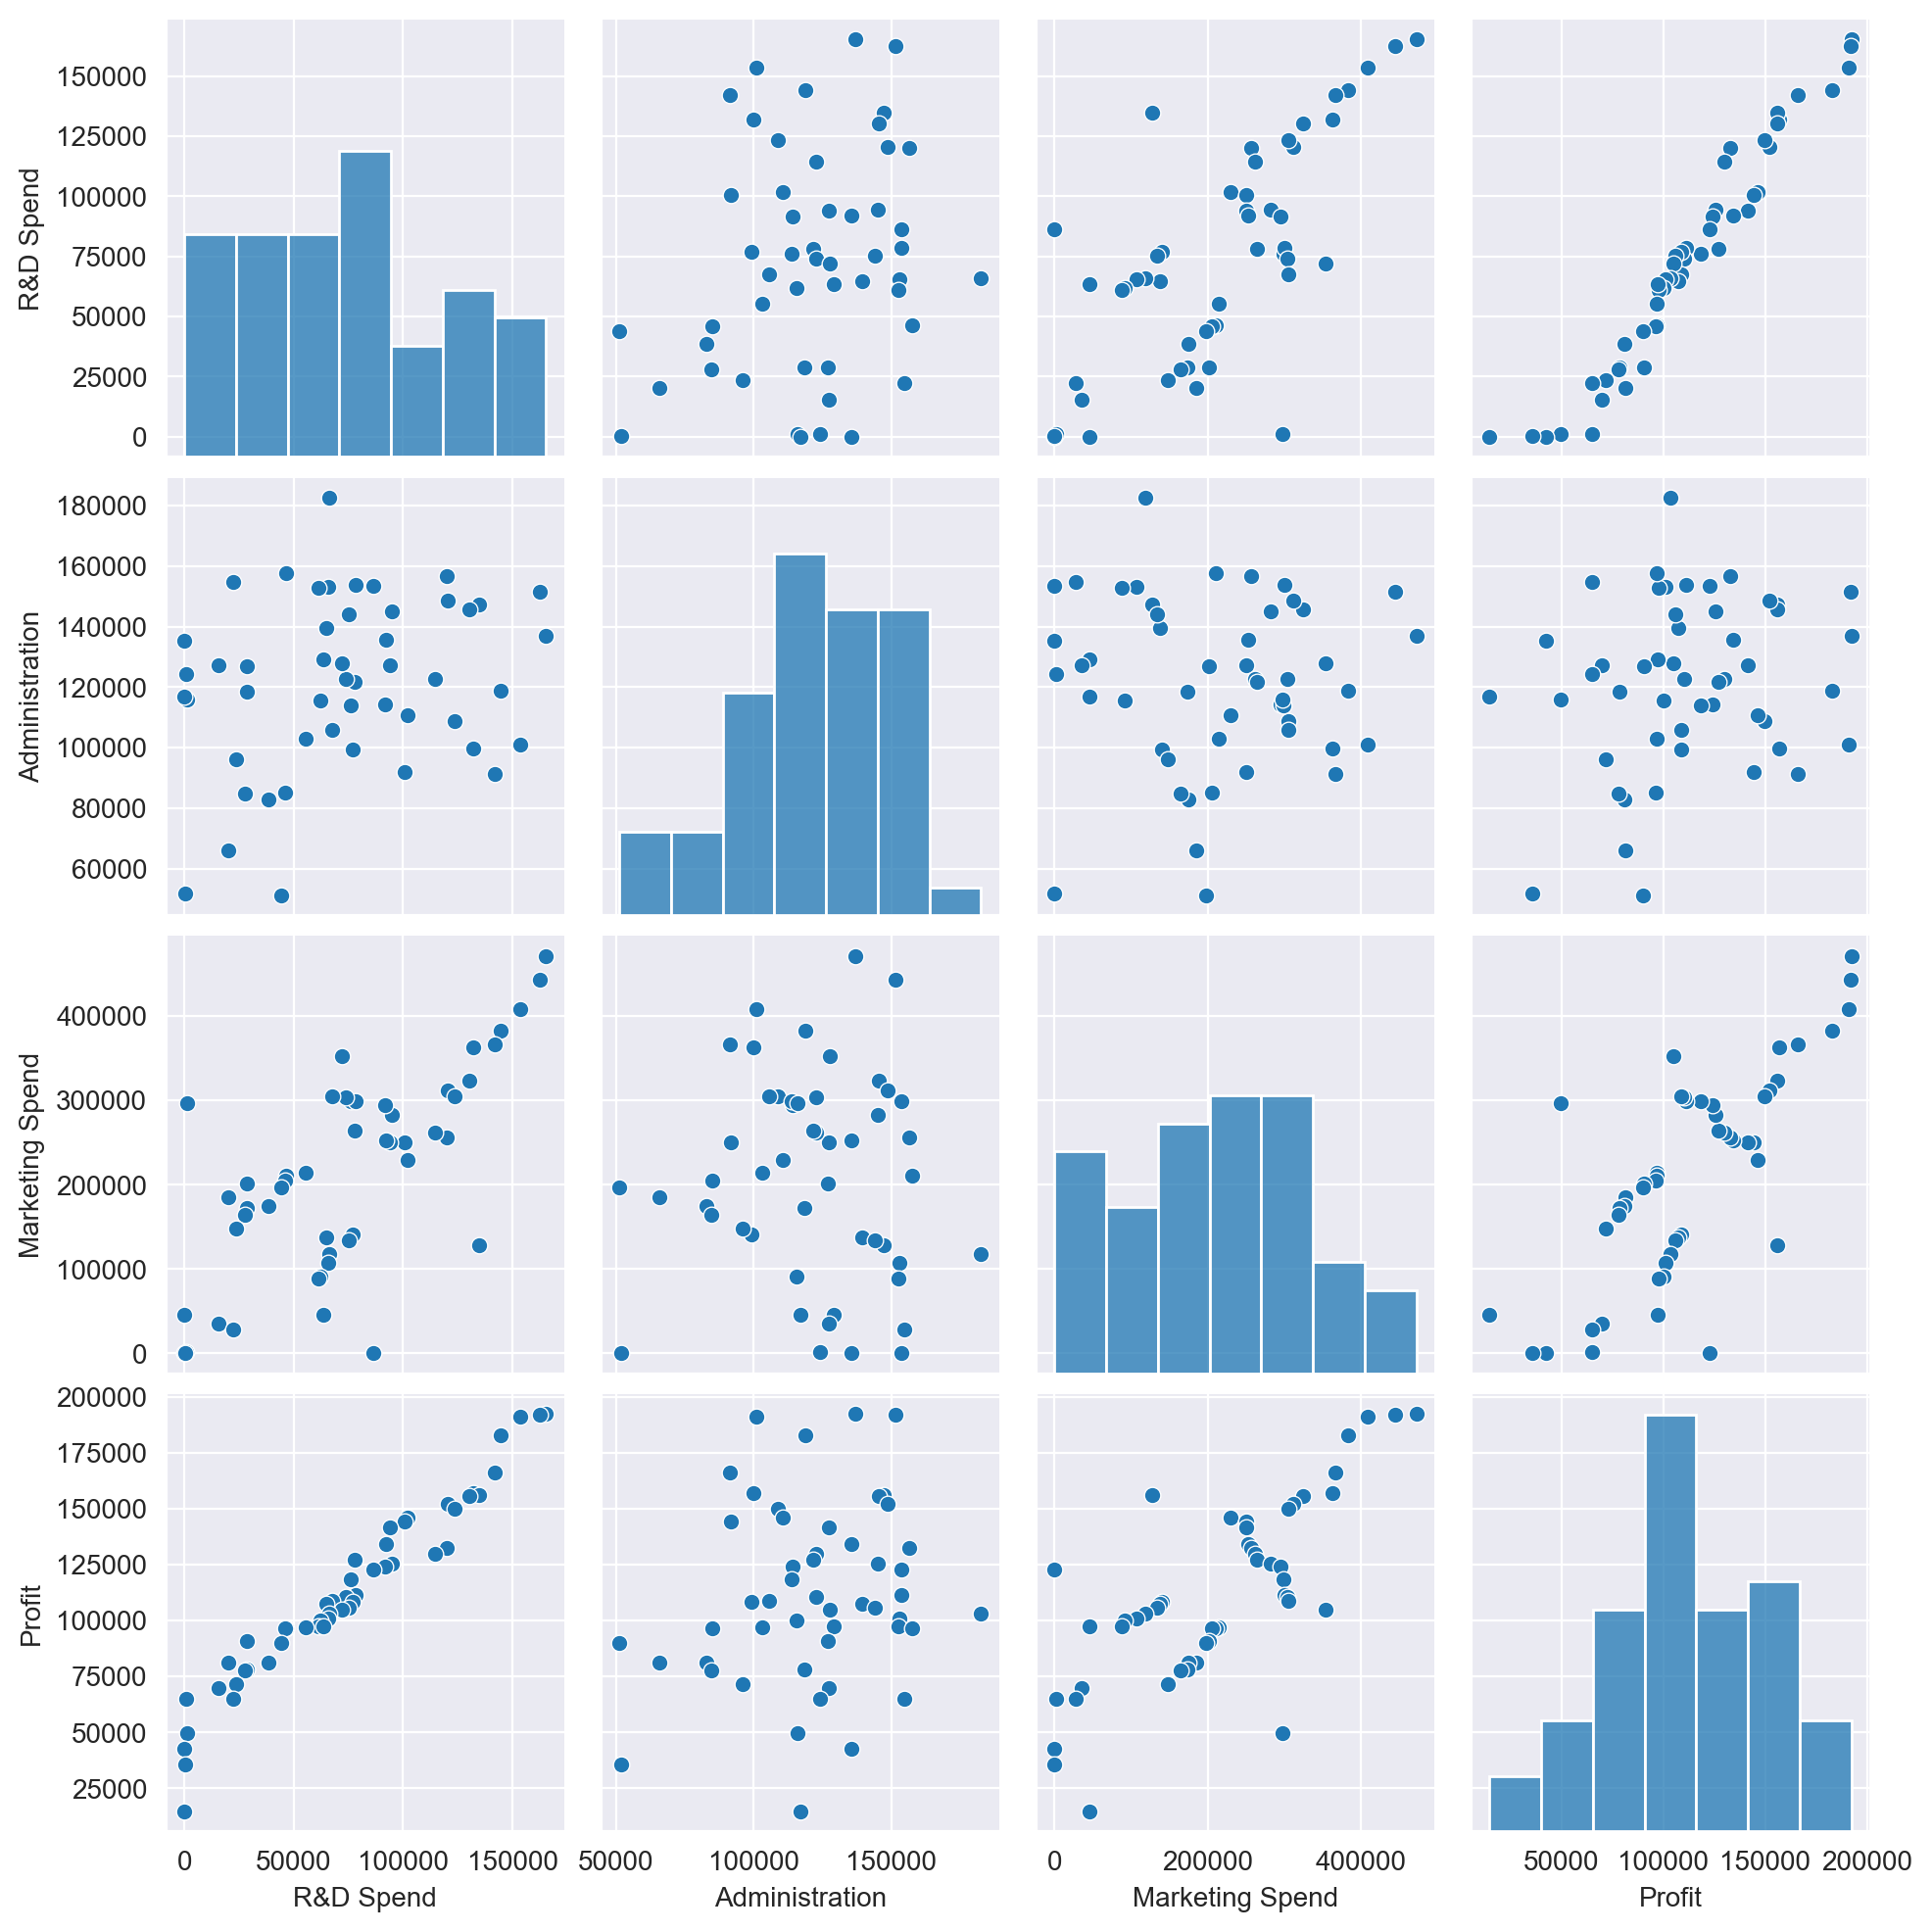

In [52]:
sns.pairplot(data= st)

In [53]:
st.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

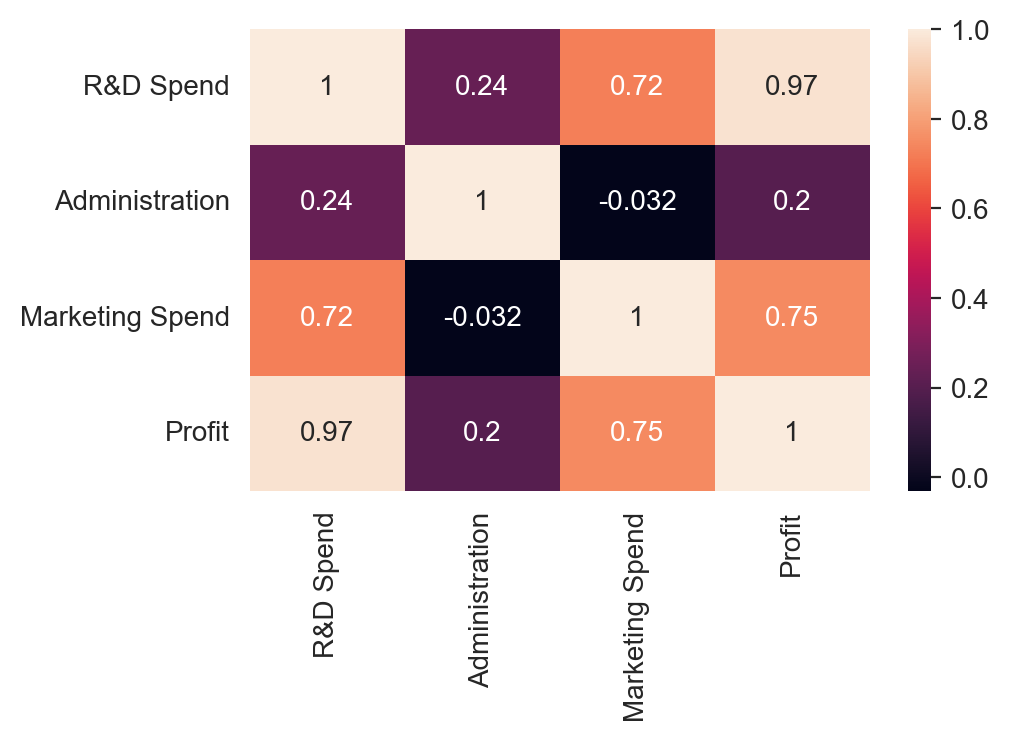

In [54]:
sns.heatmap(st.corr(), annot=True, )

- As we can see there is strong positive(+Ve) relationship between R&D Spend and Marketing Spend.

### Checking for Duplicated Values

In [55]:
st[st.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


- There are no duplicate vale in are dataset

### Outlier Detection

In [56]:
def remove_outlier(st,col):
  q1 = st[col].quantile(0.25)
  q3 = st[col].quantile(0.75)
  iqr = q3-q1

  upper = q3 + (iqr*1.5)
  lower = q1 - (iqr*1.5)
  
  st = st[(st[col]>lower) & (st[col]<upper)]

  return st

In [57]:
st = remove_outlier(st,'Profit')

<AxesSubplot:xlabel='Profit'>

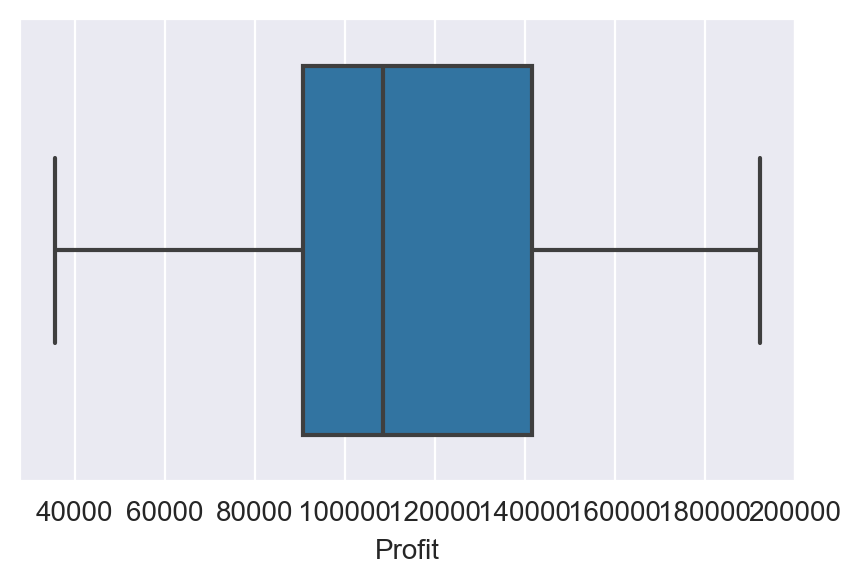

In [58]:
sns.boxplot(st['Profit'])

### Renaming the Column

In [59]:
st=st.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)

st.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Droping Non-Numarical Column

In [75]:
st.drop(columns=['State'], inplace=True)

st.head()

### Transforming The Data

#### Normalizing The Dataset

In [73]:
sc = StandardScaler()

In [77]:
scaled_st  = pd.DataFrame(sc.fit_transform(st), columns=st.columns)

scaled_st.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740
